## CSV to geodf

In [1]:
import os
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Display all columns when looking at dataframes
pd.set_option('display.max.columns', None)

# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simplify column names
power_plants = power_plants.drop(columns='Unnamed: 0')

power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


In [3]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)
points

<GeometryArray>
[ <POINT (-160.497 55.34)>,  <POINT (-87.357 33.459)>,
   <POINT (-88.01 31.007)>,  <POINT (-86.283 32.584)>,
 <POINT (-106.375 31.757)>,  <POINT (-87.781 32.602)>,
  <POINT (-86.052 33.784)>,   <POINT (-87.45 33.255)>,
  <POINT (-86.255 32.619)>,  <POINT (-86.338 33.426)>,
 ...
  <POINT (-80.124 35.396)>,   <POINT (-77.898 35.36)>,
  <POINT (-78.077 35.299)>,  <POINT (-78.077 35.299)>,
  <POINT (-80.652 35.556)>,   <POINT (-82.376 35.38)>,
  <POINT (-79.368 36.009)>,  <POINT (-79.736 35.273)>,
   <POINT (-73.91 42.877)>,  <POINT (-77.276 41.838)>]
Length: 12009, dtype: geometry

In [4]:
# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,      # Dataframe
                                geometry=points,   # Specify geometry column
                                crs='EPSG:4269')   # Specify CRS
power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)


In [5]:
# Check we have geometry column
power_plants['geometry']

0        POINT (-160.49722 55.33972)
1         POINT (-87.35682 33.45867)
2         POINT (-88.01030 31.00690)
3         POINT (-86.28306 32.58389)
4        POINT (-106.37500 31.75690)
                    ...             
12004     POINT (-82.37595 35.38014)
12005     POINT (-79.36770 36.00932)
12006     POINT (-79.73631 35.27343)
12007     POINT (-73.91048 42.87657)
12008     POINT (-77.27590 41.83800)
Name: geometry, Length: 12009, dtype: geometry

In [6]:
# Explore CRS
print('CRS: ', power_plants.crs)
print('ellipsoid: ', power_plants.crs.ellipsoid)
print('datum: ', power_plants.crs.datum)
print('is the CRS geographic?: ', power_plants.crs.is_geographic)
print('is the CRS projected?: ', power_plants.crs.is_projected)

CRS:  EPSG:4269
ellipsoid:  GRS 1980
datum:  North American Datum 1983
is the CRS geographic?:  True
is the CRS projected?:  False


<Axes: >

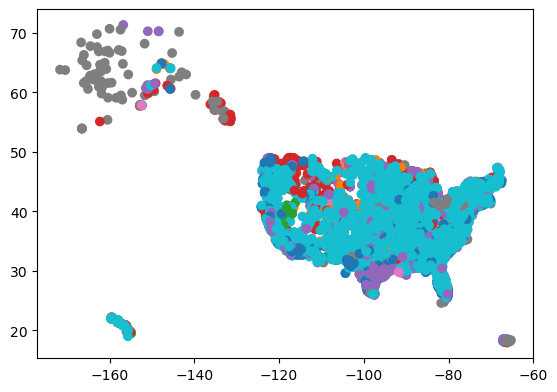

In [7]:
# Plot points and color them according to values in primsource column
power_plants.plot(column='primsource')  

## f-strings

So far, we have printed variables using string concatenation inside the `print()` function: we write commas between every string and variable we want to print. For example:

In [8]:
print('CRS: ', power_plants.crs)

CRS:  EPSG:4269


Another popular way of mixing strings and variables in print statements is by creating an **f-string** which stands for “formatted string”. 

The simplest syntax for an f-string is:
```python
f"some text {replace}"
```
where `replace` can be a variable, an expression, or a function or method call. 

For example:

In [9]:
# Explore CRS
f"ellipsoid: {power_plants.crs.ellipsoid}"

'ellipsoid: GRS 1980'

In [10]:
# Use f-strings inside the print function
print(f"datum: {power_plants.crs.datum}")

datum: North American Datum 1983


One of the advantages of using f-strings is that they offer customization for formatting the output:

In [11]:
# Set the label width to 25 characters, aligning the answers
print(f"{'Is the CRS geographic?:':<25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?:':<25} {power_plants.crs.is_projected}")

Is the CRS geographic?:   True
Is the CRS projected?:    False


## Import shapefile

In [12]:
os.getcwd()

'/Users/marinakochuten/MEDS/eds-220/eds220-2024-in-class'

In [13]:
# Create absolute filepath to data
fp = os.path.join('/',
                 'courses',
                 'EDS220',
                 'data',
                 'tl_2022_us_state',
                 'tl_2022_us_state.shp')
states = gpd.read_file(fp)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


In [14]:
# Simplify column names 
states.columns = states.columns.str.lower()

states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


EPSG:4269


<Axes: >

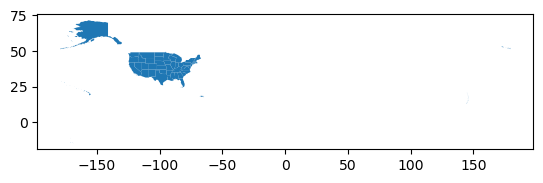

In [15]:
# Look at the CRS - always do this!
print(states.crs)
states.plot()

`for` loops

It can be easier to work with the codes as numbers instead of strings, let's update the corresponding columns in the geo-dataframe:
`region`, `division`, `statefp`

First, check is these are columns with strings:

In [16]:
print(f"regoin is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])}")

regoin is string dtype? True
division is string dtype? True
statefp is string dtype? True


This is inconvienent bc it repeats the same piece of code, only changing the column name.
Instead, using a for loop allows to succinctly print the same info:

In [17]:
 code_cols = ['region', 'division', 'statefp']

# Check whether codes columns are strings
 for column in code_cols: 
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


`for` loops execute a block of code a fixed number of times, iterating over a set of objects. In this case, we iterate over the list of column names `code_cols = ['region', 'division', 'statefp']`.

**DRY code** 

DRY = don't repeat yourself - this is a core programming principle that encourages reducint redundancy and consolidating repeated logic.
If you need to repeat the "same" code more than twice, you probably need a `for` loop.

Next, update data type of the code columns to be integers.
This time, we verify the data type of the column using the `is_numeric_dtype()` function inside an `assert` statement:

In [18]:
# Update code columns into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])   # Check conversion

The `assert` keyword does nothing if the expression next to it evaluates to `True`.
If the expression evaluates to `False` then `assert` and raises an `AssertionError` exception and stops your code from running.

Example:

In [19]:
# Does nothing if statement is True
assert 2+2 == 4

# Raises an error if statement is False
# assert 2+2 == 3

## Data selection

For this lesson, we want to use only the contiguous states. As seen in the plot, the data covers a bigger extension.

## Check-in

- What are the unique values for region, division, or state codes in the data?
- Which codes should should we select to keep only states in the contiguous US?

In [20]:
# Find unique values
for column in code_cols: 
    print(f"{column} unique values: {states[column].unique()}")

region unique values: [3 2 1 4 9]
division unique values: [5 3 4 1 8 9 2 7 6 0]
statefp unique values: [54 12 17 27 24 44 16 33 37 50  9 10 35  6 34 55 41 31 42 53 22 13  1 49
 39 48  8 45 40 47 56 15 38 21 78 69 66 23 36 32  2 60 26  5 28 29 30 20
 18 72 46 25 51 11 19  4]


Hawaii and Alaska have codes 2, 15 and then region 9 should also be excluded.

In [21]:
# Select contiguous US states
contiguous = states[ (states.region!=9) & (~states.statefp.isin([2,15])) ]

<Axes: >

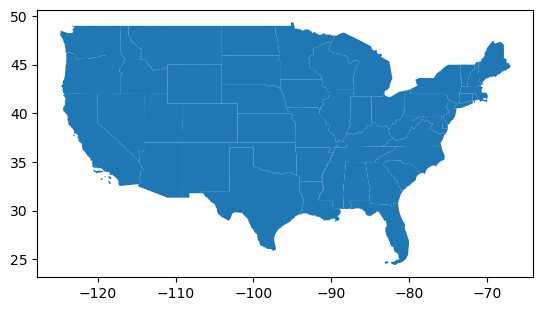

In [22]:
contiguous.plot()

The `~` tilde symbol is used in Python to negate a statement.

## Check-in
Select the data in the `power_plants` data frame for the contiguous US states.

In [23]:
power_plants = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]

## Plotting

Before we plot our data, let’s make sure they are in the same CRS:

In [24]:
contiguous.crs == power_plants.crs

True

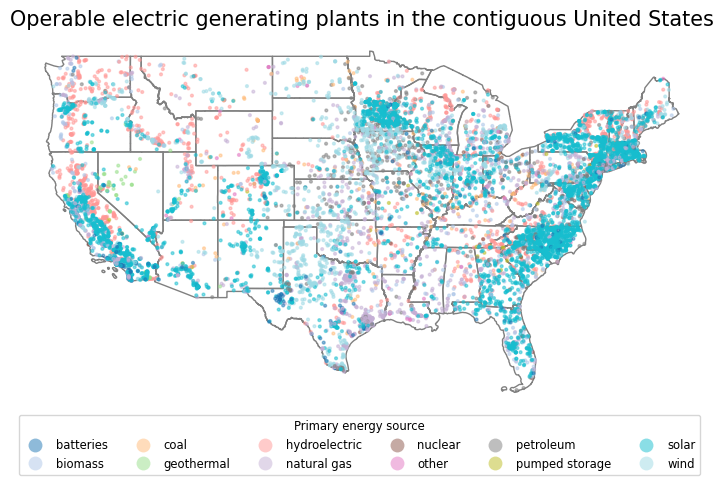

In [25]:
fig, ax = plt.subplots(figsize=(9,5))   # Update figure size, this is in inches

# Remove axis for a cleaner map
ax.axis('off')

# Title for the plot
ax.set_title('Operable electric generating plants in the contiguous United States', 
              fontsize=15)

# Add states
contiguous.plot(ax=ax,
               color='none',
               edgecolor='grey')

# Add electric power plants colored by energy source
power_plants.plot(ax=ax,
                 column='primsource',   # Color by values in this column
                 legend=True,
                  markersize=4,
                  cmap='tab20',
                  alpha=0.5,
                  legend_kwds={   # kwds is expecting a dictionary
                      'title': 'Primary energy source',
                      'title_fontsize': 'small',
                      'fontsize': 'small',
                      'loc': 'upper left',   # I'm grabbing my legend from the upper left corner and that's how im moving it around
                      'bbox_to_anchor': (0,0),   # 
                      'ncol': 6 
                  }
                 )    

plt.show()


In the map above we specified the figure size when creating the plot. This size is given in inches, but can be updated to other units (pixels, cm, etc).

We also controlled the legend location using `loc` and `bbox_to_anchor` in the `legend_kwds`:

- `loc` indicates the **corner of the legend we want to use for placement**, and
- `bbox_to_anchor` is a tuple with coordinates indicating where to place the corner specified in `loc` relative to the axes. Values between 0 and 1 are *inside* the axes.

## `for` with `zip`

Often, we need to iterate simultaneously over two lists (or other iterables). 

The `zip()` function in Python allows you to combine two or more lists (or other iterables) so that you can iterate over their elements in pairs. 

When used with a for loop, it lets you process elements from each list together, like this example:

In [26]:
# Iterate over a single list
numbers = [1, 2, 3]
for num in numbers:
    print(num)

1
2
3


In [27]:
# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num, letter)

1 a
2 b
3 c


Let’s see a practical application of `for` loops and `zip()` with `matplotlib` subplots. 

A common situation when code gets repeated is when creating subplots. For example:

<function matplotlib.pyplot.show(close=None, block=None)>

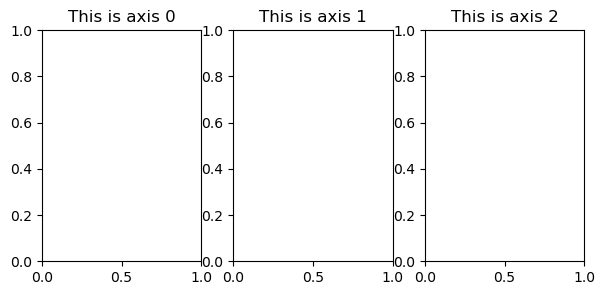

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

axes[0].set_title("This is axis 0")
axes[1].set_title("This is axis 1")
axes[2].set_title("This is axis 2")

plt.show

## Check-in

Use `for` and `zip()` to create the same subplots and avoid redundancy.

<function matplotlib.pyplot.show(close=None, block=None)>

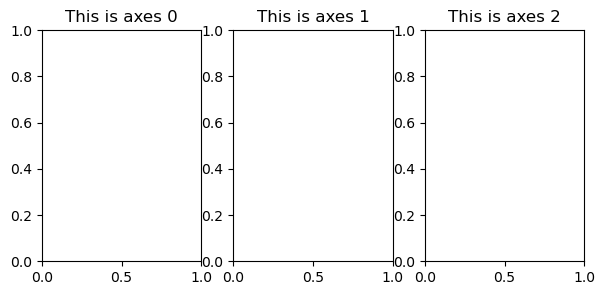

In [29]:
# Using zip
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

for ax, i in zip(axes, [0,1,2]):
    ax.set_title(f"This is axes {i}")
    
plt.show

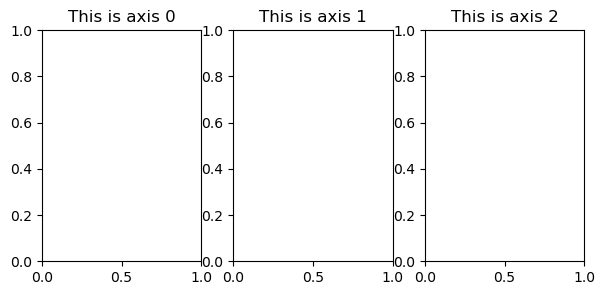

In [30]:
# Another way:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7,3))

for i in [0,1,2]:
    axes[i].set_title(f"This is axis {i}")

plt.show()

## Exercise:

Remember, we have been working with two datasets, power_plants and states

In [31]:
power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)


In [32]:
states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


In [33]:
# 1. Select the power plants in California in a variable named ca_power_plants.

ca_power_plants = power_plants[power_plants.state == "California"]
ca_power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
19,11589,34,Rollins,13402,Nevada Irrigation District,IPP Non-CHP,15531 Arrow Head Lane,Colfax,Placer,California,95713.0,hydroelectric,Hydroelectric = 12.1 MW,Conventional Hydroelectric,12.1,12.1,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.953341,39.134259,POINT (-120.95334 39.13426)
38,11608,72,Venice Hydro,12397,Metropolitan Water District of S CA,Electric Utility,3815 Sepulveda Blvd,Culver City,Los Angeles,California,90230.0,hydroelectric,Hydroelectric = 10.1 MW,Conventional Hydroelectric,10.1,10.1,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-118.416800,34.011350,POINT (-118.41680 34.01135)
54,11624,104,J S Eastwood,17609,Southern California Edison Co,Electric Utility,Hwy 168 Sierra National Forest,Shaver Lake,Fresno,California,93664.0,pumped storage,Pumped Storage = 199.8 MW,Hydroelectric Pumped Storage,199.8,199.8,NaN,NaN,NaN,NaN,NaN,199.8,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-119.256700,37.147926,POINT (-119.25670 37.14793)


In [34]:
# 2. Create a list named top_sources with California’s top 3 electric primary sources.

# Need to count the number of times each 'primsource' appears and store the top 3
# value_counts()

top_sources = ca_power_plants.primsource.value_counts().head(3).keys().tolist()
top_sources

# Another way:
# top_sources = ca_power_plants.primsource.value_counts().index[:3].tolist()

['solar', 'natural gas', 'hydroelectric']

In [35]:
# 3. Isolate the California state boundary in a variable named ca_boundary.

ca_boundary = states[states.name == 'California']
ca_boundary

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
13,4,9,6,01779778,06,CA,California,00,G4000,A,403673617862,20291712025,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.99987 41.18397, -119.9998..."


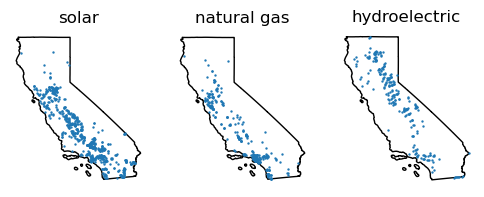

In [36]:
# 4. Recreate the plot:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6,3))

for ax, source in zip(axes,top_sources) :
    ca_boundary.plot(ax=ax,
                    color='none')
    
    # Select points for the sources
    subset = ca_power_plants[ca_power_plants.primsource == source]
    subset.plot(ax=ax,
               markersize = 0.5)
    
    ax.set_title(source)
    ax.axis('off')

plt.show()


## Functions

Next, we want to keep exploring these maps of the top 3 electric primary sources for different states. 

This is a scenario where creating functions can be useful. 

In Python, **functions** are blocks of reusable code designed to perform specific tasks, helping to make your code more modular and organized. 

The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

We define a function using:

- the `def` keyword, followed by the function name, parentheses (which can contain parameters), and a colon.
- The first line(s) of the function should be a `docstring`, this is a special kind of comment used to describe what the function will do. It must be indented and in between triple quotes `"""`.
- After the `docstring`, you write the body of the function, this is the code that will be executed when the function is called. The whole body of the function should be indentated to indicate the function’s scope.
- The `return` keyword is used to allow the function to return values. Functions that do not return any values don’t need to have a `return` keyword.

Example:
A simple function with a one-line docstring and no return values

In [37]:
def greet():
    """Print a greeting message"""
    print('Hello, welcome to the class!')

In [38]:
greet()

Hello, welcome to the class!


Example 2:
A function with a more detailed docstring and a return value

In [39]:
def circle_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args:
        radius (float): The radius of the circle
    Returns:
        float: The area of the circle, calculated as pi * radius^2
    """
    area = 3.14159 * radius ** 2
    return area

In [40]:
circle_area(2)

12.56636

## Example

Going back to our power plants data frame, let’s create a function that will give us the top 3 primary energy sources for a given state:

In [41]:
def top3_sources(state, power_plants):
    """
    Find the top 3 electric primary sources of given state.
    
    Args:
        state (str): The US state we want information about.
        power_plants (pd.DataFrame): DataFrame containing data 
        on power plants, with at least 'state' and 'primsource' columns.
    Returns:
        list: A list of the top 3 primary sources of the state within the power_plants data frame.
    """
    state_power_plants = power_plants[power_plants['state']==state]
    top_sources = (state_power_plants['primsource']
                                .value_counts()
                                .index[:3]
                                .tolist()
                                )
    return top_sources

In [42]:
top3_sources('New York', power_plants)

['solar', 'hydroelectric', 'natural gas']

In [43]:
top3_sources('California', power_plants)

['solar', 'natural gas', 'hydroelectric']

In [44]:
top3_sources('Texas', power_plants)

['natural gas', 'wind', 'solar']

Let’s do one more example and create a function that will produce a plot given a list of primary sources and a state name:

In [45]:
def plot_3_energy_sources(state, sources, power_plants):
    
    # Raise error if there are more than three sources
    assert len(sources) == 3, 'sources must have three elements to produce the plot'

    # Isolate the state boundary and power plants
    boundary = states[states.name==state]
    state_power_plants = power_plants[power_plants['state']==state]

    # Create plot
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 3))

    for ax, source in zip(axes, sources):
        boundary.plot(ax=ax,                
                      color='none',
                      edgecolor='#362312')
        subset = state_power_plants[state_power_plants['primsource'] == source]
        subset.plot(ax=ax, markersize=5, alpha=0.5)
        ax.set_title(source)
        ax.axis('off')  # Remove axes for a cleaner look

    plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")
    plt.tight_layout()
    plt.show()

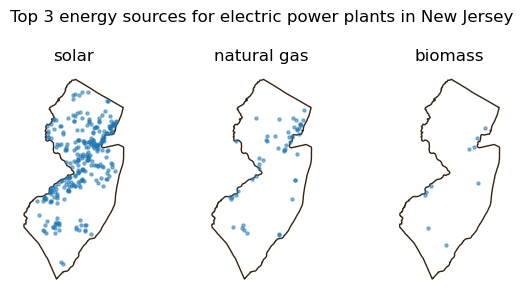

In [46]:
plot_3_energy_sources('New Jersey', 
                         top3_sources('New Jersey', power_plants),
                         power_plants)

Write a function states_with_source that takes a primary energy source (e.g., ‘solar’) and returns a list of states that use that source.

In [47]:
def states_with_source(primary_source):
    
    primary_energy_source = power_plants[power_plants['primsource']==primary_source]
    state_list = (primary_energy_source['state']
                                .unique()
                                .tolist()
                                )
    return state_list

In [48]:
states_with_source('solar')

['Massachusetts',
 'California',
 'Arizona',
 'Nevada',
 'Colorado',
 'New Jersey',
 'North Carolina',
 'Florida',
 'Pennsylvania',
 'Illinois',
 'Texas',
 'Ohio',
 'New Mexico',
 'Delaware',
 'Oregon',
 'Vermont',
 'New York',
 'Maryland',
 'Utah',
 'Georgia',
 'Minnesota',
 'Indiana',
 'Rhode Island',
 'Tennessee',
 'Connecticut',
 'South Carolina',
 'Missouri',
 'Kansas',
 'Virginia',
 'Idaho',
 'Nebraska',
 'Wisconsin',
 'Michigan',
 'Arkansas',
 'Alabama',
 'Mississippi',
 'Maine',
 'South Dakota',
 'Kentucky',
 'Iowa',
 'Montana',
 'Wyoming',
 'Oklahoma',
 'Louisiana',
 'Washington',
 'District of Columbia',
 'New Hampshire']